### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf

In [4]:
tf.__version__

'1.15.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


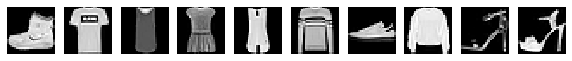

In [12]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()

In [0]:
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000,784)

In [26]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.backend import backend

In [0]:
## hyperparameters
learning_rate = 0.01
hidden_nodes = 256
output_nodes = 10
        
model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax'))
    
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Execute the model using model.fit()

In [30]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 19us/sample - loss: 112.1227 - acc: 0.0923 - val_loss: 8303.6572 - val_acc: 0.1000
Epoch 2/50
60000/60000 [==============================] - 1s 18us/sample - loss: 8258.8682 - acc: 0.1000 - val_loss: 185656.1094 - val_acc: 0.1000
Epoch 3/50
60000/60000 [==============================] - 1s 18us/sample - loss: 186283.6875 - acc: 0.1000 - val_loss: 391372.0000 - val_acc: 0.1000
Epoch 4/50
60000/60000 [==============================] - 1s 18us/sample - loss: 393777.4375 - acc: 0.1000 - val_loss: 438842752.0000 - val_acc: 0.1000
Epoch 5/50
60000/60000 [==============================] - 1s 18us/sample - loss: 433830080.0000 - acc: 0.1000 - val_loss: 1488427941888.0000 - val_acc: 0.1000
Epoch 6/50
60000/60000 [==============================] - 1s 18us/sample - loss: 1492487372800.0000 - acc: 0.1000 - val_loss: 3412708556800.0000 - val_acc: 0.1000
Epoch 7/50
60000/60000 [============

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
## hyperparameters
learning_rate = 0.01
hidden_nodes = 256
output_nodes = 10
        
model1 = Sequential()
model1.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(hidden_nodes, activation='relu'))
model1.add(Dense(output_nodes, activation='softmax'))
    
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Execute the model

In [38]:
model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 25us/sample - loss: 2.8977 - acc: 0.0578 - val_loss: 15.3551 - val_acc: 0.1516
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.6842 - acc: 0.0843 - val_loss: 9.2841 - val_acc: 0.1926
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3301 - acc: 0.1864 - val_loss: 6.4437 - val_acc: 0.2640
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.9460 - acc: 0.3587 - val_loss: 5.0161 - val_acc: 0.3617
Epoch 5/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.6161 - acc: 0.4880 - val_loss: 4.2801 - val_acc: 0.4287
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 1.3683 - acc: 0.5625 - val_loss: 3.8416 - val_acc: 0.4829
Epoch 7/50
60000/60000 [==============================] - 1s 21us/sample - loss: 1.1948 - acc: 0.6079 - val_loss: 3

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
## hyperparameters
learning_rate = 0.001
hidden_nodes = 256
output_nodes = 10
        
model2 = Sequential()
model2.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(hidden_nodes, activation='relu'))
model2.add(Dense(output_nodes, activation='softmax'))
    
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [40]:
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/sample - loss: 2.8495 - acc: 0.0966 - val_loss: 20.0115 - val_acc: 0.1165
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.8286 - acc: 0.0991 - val_loss: 14.2026 - val_acc: 0.1246
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.7891 - acc: 0.1037 - val_loss: 11.3786 - val_acc: 0.1345
Epoch 4/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.7338 - acc: 0.1110 - val_loss: 9.5459 - val_acc: 0.1461
Epoch 5/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.6652 - acc: 0.1198 - val_loss: 8.1928 - val_acc: 0.1612
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.5861 - acc: 0.1327 - val_loss: 7.1229 - val_acc: 0.1800
Epoch 7/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.4990 - acc: 0.1488 - val_loss:

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
## hyperparameters
learning_rate = 0.03
        
model3 = Sequential()
model3.add(Dense(100,input_shape=(784,), activation='sigmoid'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(Dense(100, activation='sigmoid'))
model3.add(Dense(10, activation='softmax'))
    
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [42]:
model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.6278 - acc: 0.0823 - val_loss: 2.4714 - val_acc: 0.1029
Epoch 2/50
60000/60000 [==============================] - 1s 10us/sample - loss: 2.5352 - acc: 0.1055 - val_loss: 2.3893 - val_acc: 0.1521
Epoch 3/50
60000/60000 [==============================] - 1s 10us/sample - loss: 2.3951 - acc: 0.1548 - val_loss: 2.3045 - val_acc: 0.2149
Epoch 4/50
60000/60000 [==============================] - 1s 10us/sample - loss: 2.2521 - acc: 0.2322 - val_loss: 2.2300 - val_acc: 0.2213
Epoch 5/50
60000/60000 [==============================] - 1s 10us/sample - loss: 2.1208 - acc: 0.3569 - val_loss: 2.1692 - val_acc: 0.3090
Epoch 6/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.0059 - acc: 0.4809 - val_loss: 2.1218 - val_acc: 0.3694
Epoch 7/50
60000/60000 [==============================] - 1s 10us/sample - loss: 1.9038 - acc: 0.5432 - val_loss: 2.

## Review model

In [45]:
print(model.evaluate(trainX, trainY, verbose=0))
print(model.evaluate(testX, testY, verbose=0))

[0.9806842393239339, 0.76463336]
[0.9985099328994751, 0.749]


In [46]:
print(model1.evaluate(trainX, trainY, verbose=0))
print(model1.evaluate(testX, testY, verbose=0))

[0.5823219331304232, 0.80265]
[0.6280795967340469, 0.7893]


In [47]:
print(model2.evaluate(trainX, trainY, verbose=0))
print(model2.evaluate(testX, testY, verbose=0))

[0.9812521351973216, 0.6838]
[1.0143625896453858, 0.6737]


In [48]:
print(model3.evaluate(trainX, trainY, verbose=0))
print(model3.evaluate(testX, testY, verbose=0))

[1.124451922194163, 0.66398335]
[1.1411731297492982, 0.6522]


In [0]:
# From above outputs, it can be inferred that model1 has the least loss value & hence is the best amongst all models designed.

### Run the model